In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import torch
import torch.nn.functional as F

# Step 1: Load the Bitcoin open price and date from dataset
# Load the Bitcoin open price data
df = pd.read_csv('bitcoin.csv')
df.drop('Adj Close', axis=1, inplace=True)
df.drop(df.index[:106], inplace=True)
df.drop(df.index[2557:], inplace=True)
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime data type
df_open = pd.DataFrame(df[['Date', 'Open']])

year_list = [
    (df_open[:365], df_open[365:731]),   # 2015
    (df_open[365:731], df_open[731:1096]),  # 2016
    (df_open[731:1096], df_open[1096:1461]),  # 2017
    (df_open[1096:1461], df_open[1461:1826]),  # 2018
    (df_open[1461:1826], df_open[1826:2192]),  # 2019
    (df_open[1826:2192], df_open[2192:]),   # 2020
]

def save_data_to_excel(train_data, test_data, predicted_prices, loss_per_epoch, filename):
    df_train = pd.DataFrame({'Train_Date': train_data['Date'], 'Train_Open': train_data['Open']})
    df_test = pd.DataFrame({'Test_Date': test_data['Date'], 'Test_Open': test_data['Open']})
    df_pred = pd.DataFrame({'Predicted_Open': predicted_prices.reshape(-1)})
    df_loss = pd.DataFrame({'Epoch': range(1, len(loss_per_epoch)+1), 'Loss': loss_per_epoch})


    with pd.ExcelWriter(filename, mode='w', engine='openpyxl') as writer:
        df_train.to_excel(writer, sheet_name='Data', startcol=0, index=False)
        df_test.to_excel(writer, sheet_name='Data', startcol=len(df_train.columns) + 2, index=False)
        df_pred.to_excel(writer, sheet_name='Data', startcol=len(df_train.columns) + len(df_test.columns) + 4, index=False)
        df_loss.to_excel(writer, sheet_name='Data', startcol=0, startrow=max(len(df_train), len(df_test), len(df_pred)) + 2, index=False)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# CALCULATE ERROR
def calculate_errors(test_data, predicted_prices, time_steps):
    mse = mean_squared_error(test_data['Open'].iloc[time_steps:], predicted_prices)
    print('Mean Squared Error (MSE):', mse)
    mae = mean_absolute_error(test_data['Open'].iloc[time_steps:], predicted_prices)
    print('Mean Absolute Error (MAE):', mae)



Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0995
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0111
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0071
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0058
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0047
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0057
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0053
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0045
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0046
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0041
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0034
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0041
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0025
Epoch 16/50
12/

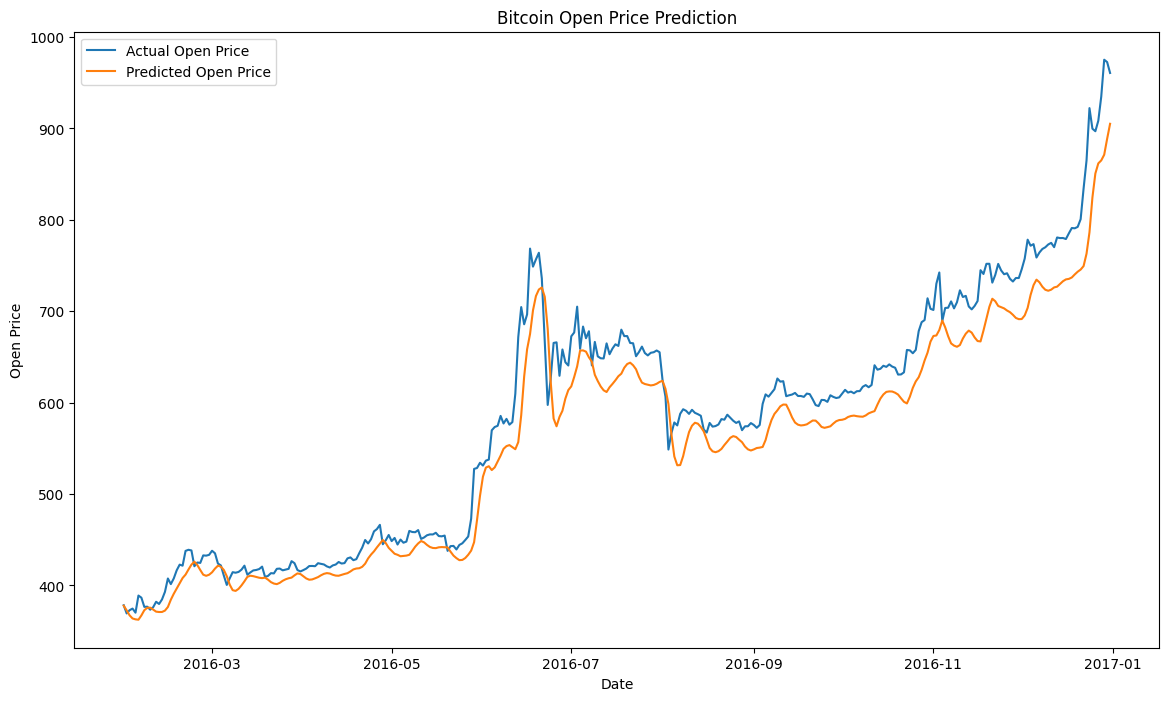

Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0886
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0072
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0059
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0036
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0036
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0031
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0030
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0037
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0026
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0020
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0027
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0032
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019
Epoch 16/50
12/

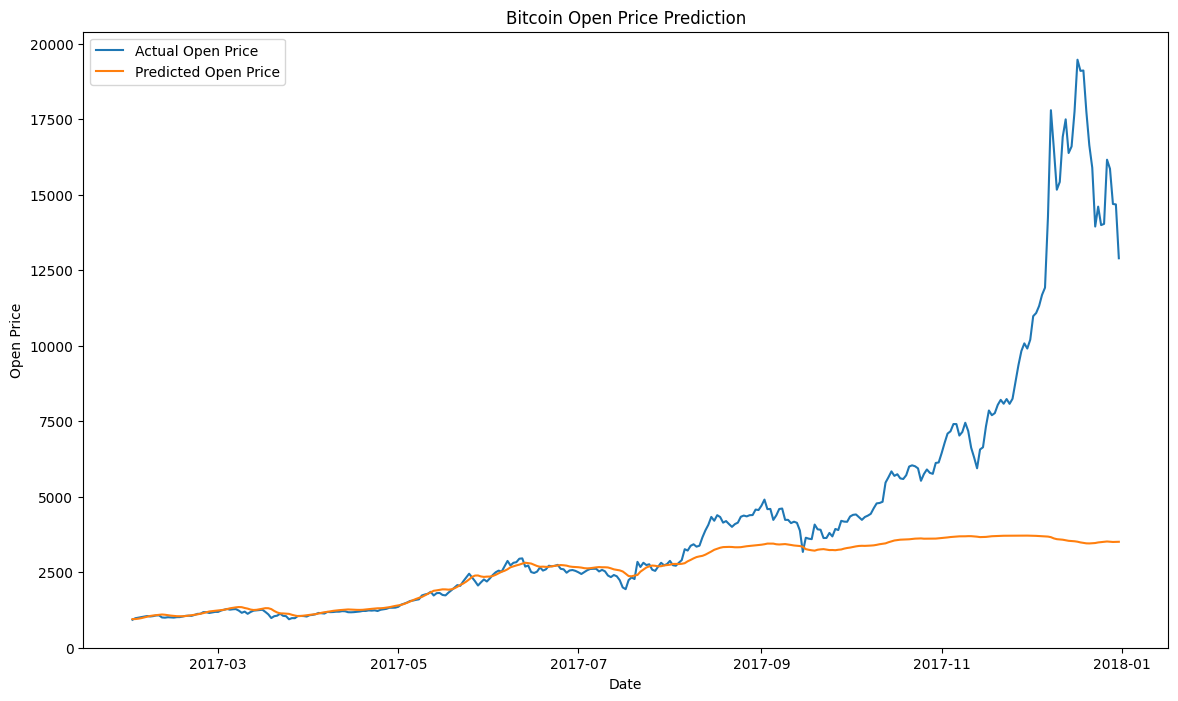

Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0368
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0031
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0020
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0017
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0016
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0017
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3975e-04
Epoch 16/50

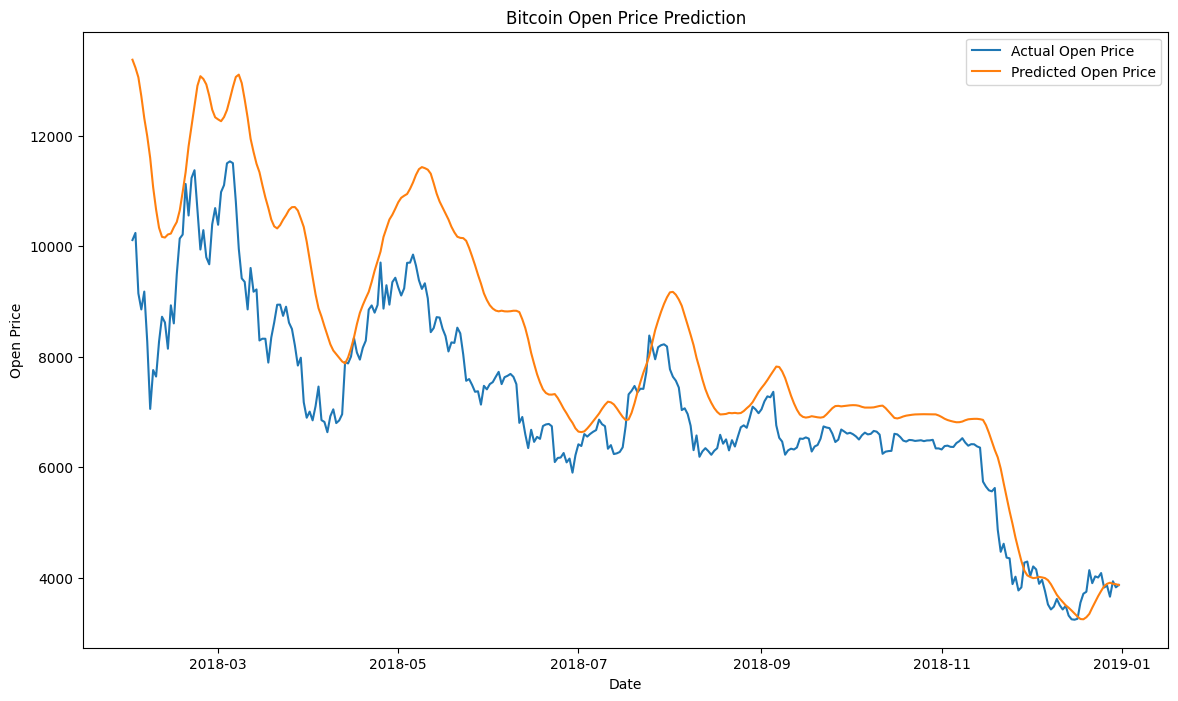

Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0658
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0068
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0051
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0038
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0032
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0029
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0029
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0018
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0020
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019
Epoch 16/50
12/

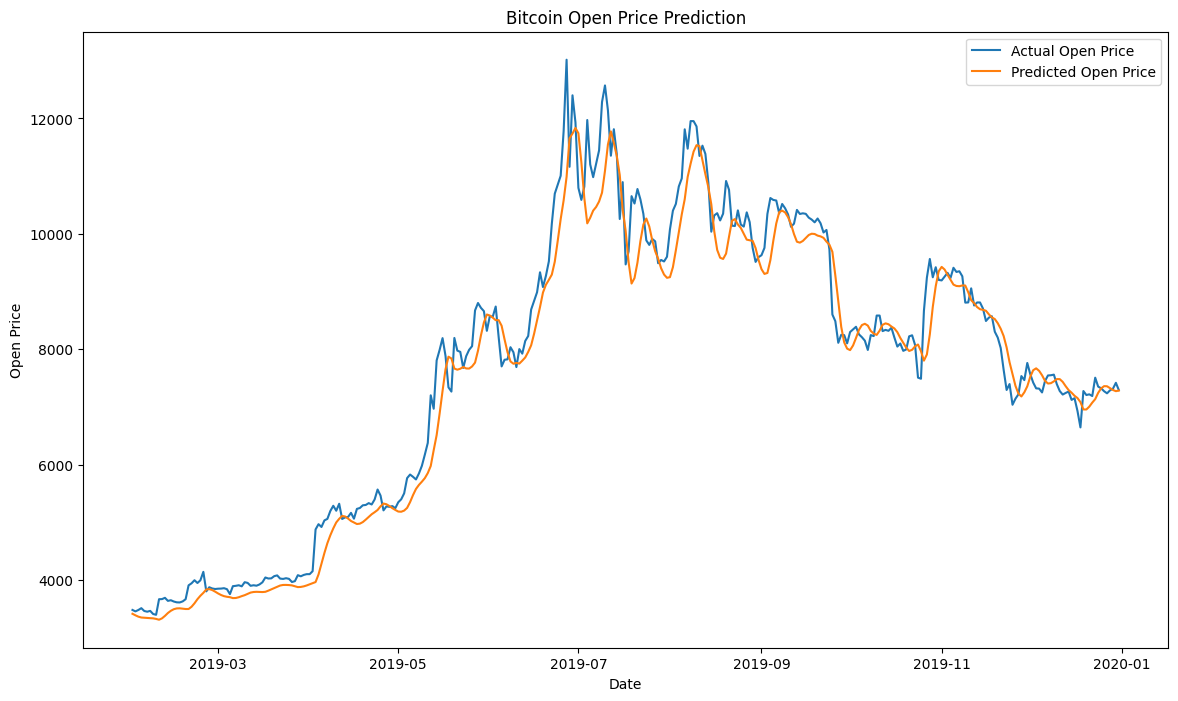

Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1615
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0068
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0062
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0061
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0051
Epoch 16/50
12/

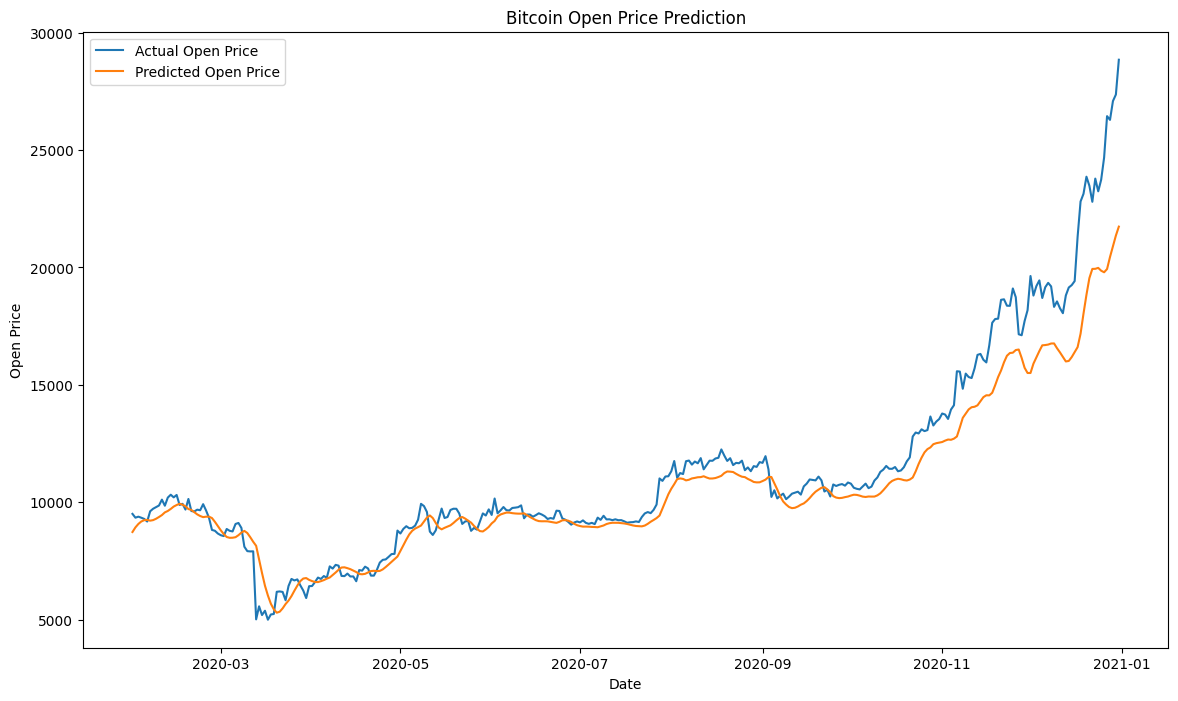

Epoch 1/50


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0441
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0036
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0019
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0012  
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0015
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0013
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0011
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0010    
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.7226e-04
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0012
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.5270e-04
E

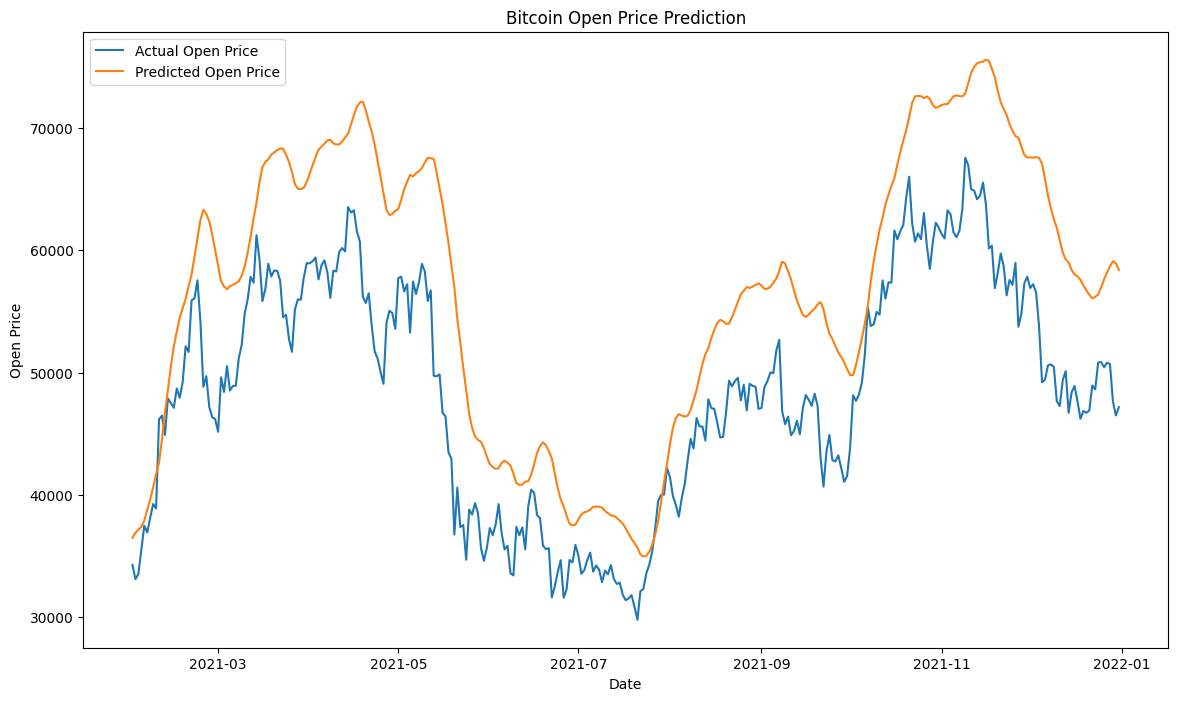

In [2]:
# LSTM FUNCTION ======================> CORRECT CODE

def run_lstm_for_years(year_list):
    for train_data, test_data in year_list:

        scaler = MinMaxScaler(feature_range=(0, 1))
        train_scaled = scaler.fit_transform(train_data['Open'].values.reshape(-1, 1))
        test_scaled = scaler.transform(test_data['Open'].values.reshape(-1, 1))

        def create_dataset(data, time_steps):
            X, y = [], []
            for i in range(len(data) - time_steps):
                X.append(data[i:(i + time_steps), 0])
                y.append(data[i + time_steps, 0])
            return np.array(X), np.array(y)

        time_steps = 30
        X_train, y_train = create_dataset(train_scaled, time_steps)
        X_test, y_test = create_dataset(test_scaled, time_steps)

        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        model = Sequential()
        model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=60))
        model.add(Dense(units=1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        model.fit(X_train, y_train, epochs=50, batch_size=30)

        loss_per_epoch = model.history.history['loss']

        # Plot the predictions against the actual Bitcoin open prices
        # Prediction and Error Correction
        # Prediction and Error Correction
        predicted_prices = model.predict(X_test)
        predicted_prices = scaler.inverse_transform(predicted_prices)
        

        calculate_errors(test_data, predicted_prices, time_steps)
        filename = f'bitcoin_prediction_{train_data.iloc[0]["Date"].year}.xlsx'
        save_data_to_excel(train_data, test_data, predicted_prices, loss_per_epoch, filename)

        # Plotting
        plt.figure(figsize=(14, 8))
        plt.plot(test_data['Date'].iloc[time_steps:], test_data['Open'].iloc[time_steps:], label='Actual Open Price')
        plt.plot(test_data['Date'].iloc[time_steps:], predicted_prices, label='Predicted Open Price')
        plt.title('Bitcoin Open Price Prediction')
        plt.xlabel('Date')
        plt.ylabel('Open Price')
        plt.legend()
        plt.show()

# Call the function with your year_list

run_lstm_for_years(year_list)